In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

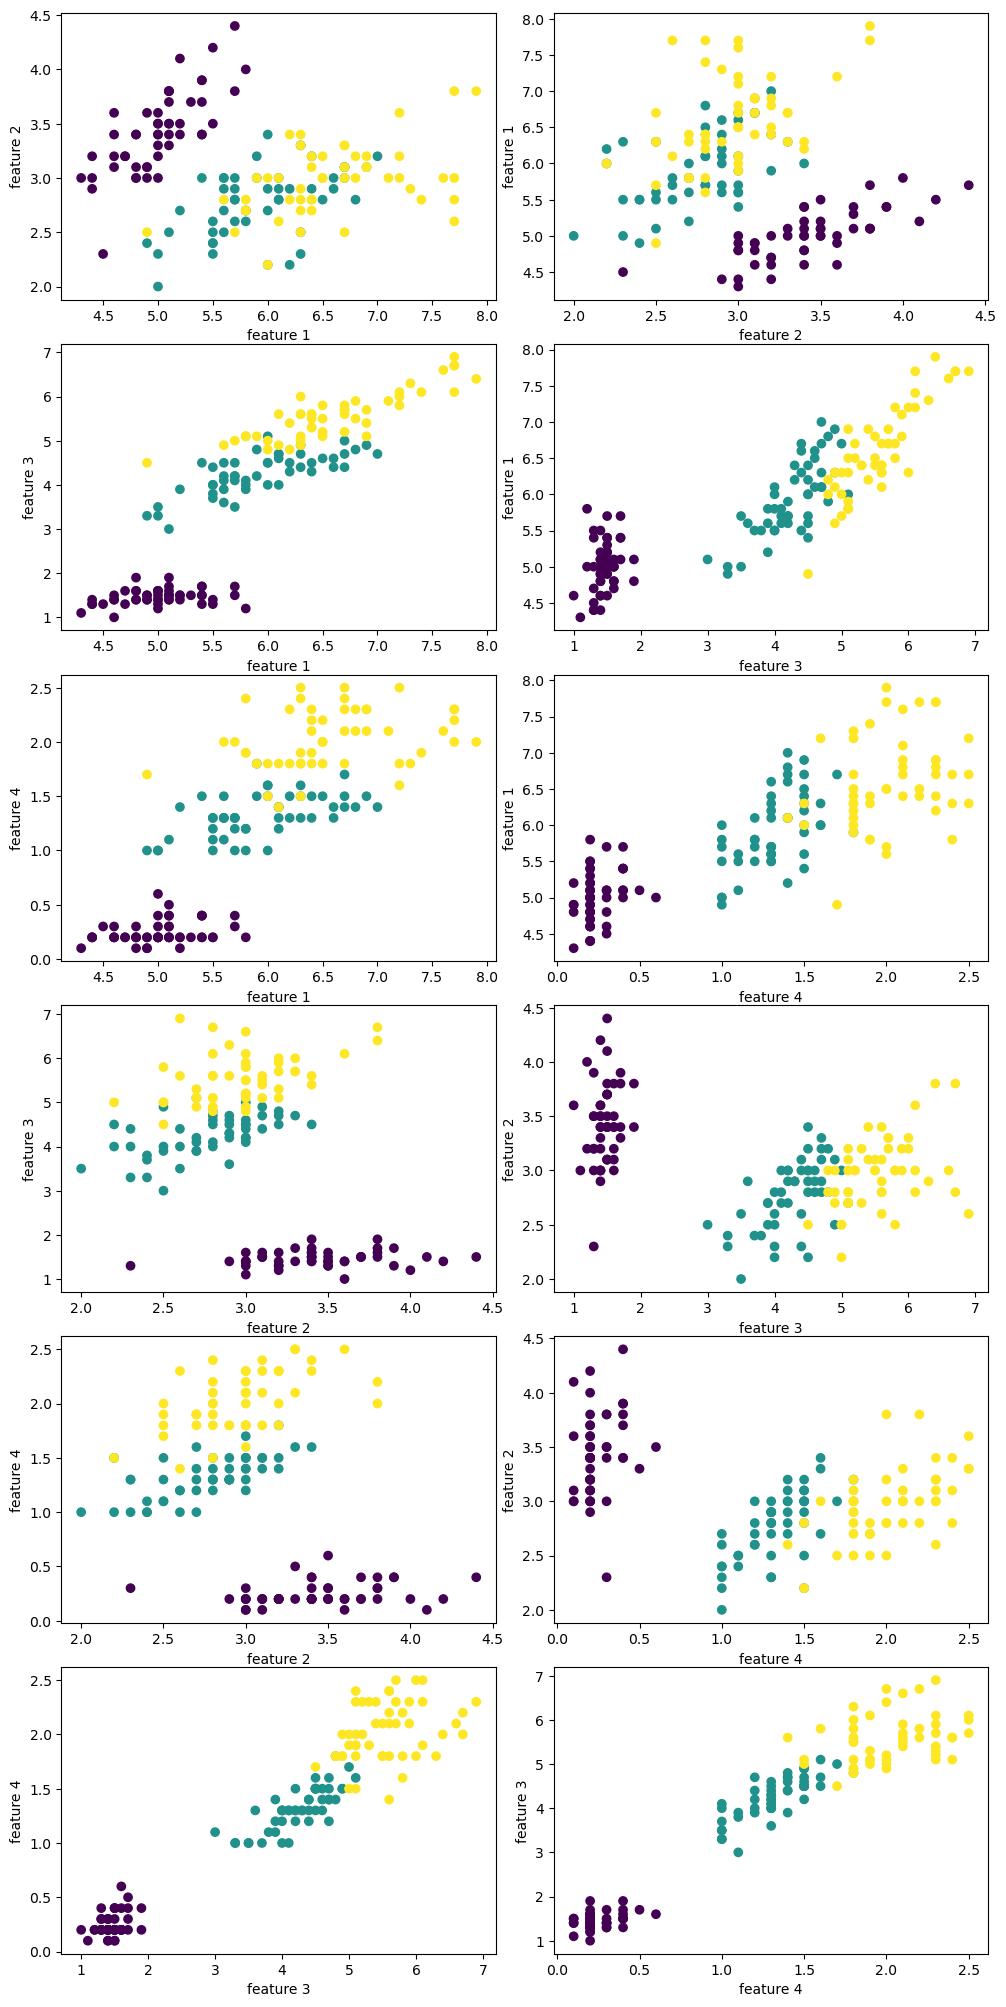

In [2]:
fig, ax = plt.subplots(6, 2, figsize=(10,20))
fig.tight_layout()

k = 0
for i in range(X.shape[1]-1):
    for j in range(i+1,X.shape[1]):
        ax[k,0].scatter(X[:,i],X[:,j], c=y)
        ax[k,0].set(xlabel='feature '+str(i+1), ylabel="feature "+str(j+1))
        ax[k,1].scatter(X[:,j],X[:,i], c=y)
        ax[k,1].set(xlabel='feature '+str(j+1), ylabel="feature "+str(i+1))
        k += 1
plt.show()

##### สีดำจะแยกออกจากกัน แต่เขียวเหลือง ยัง overlap อยู่
------------------------------------------------------------


##### PCA ใช้การลด dimention หรือ ทำ Feature extraction เป็น unsupervised learning 
##### Feature extraction คือการสร้าง Matrix N, K คอลัมน์ มาคูณ กับ M, N (โดย N น้อยกว่า K)
##### หรือเรียกว่าการฉาย Projection ?????

##### ประสิทธิภาพอาจจะไม่ดีขึ้น, ดีขึ้น, แย่ลงแต่ไม่มาก ช่วยลด noise
##### สรุป รันได้เร็วขึ้นกับ data ใหญ่ๆ

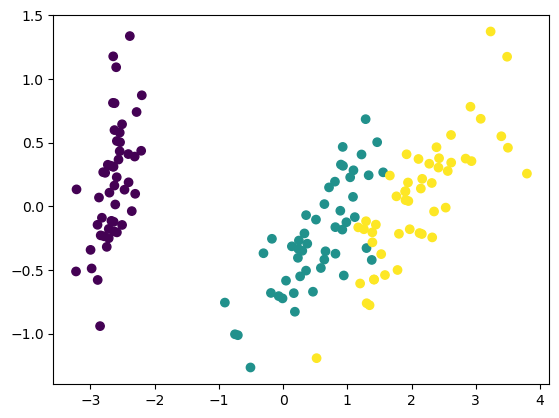

In [2]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X)

X_reduced = pca_model.transform(X)

plt.scatter(X_reduced[:, 0],X_reduced[:, 1],c=y)

# **จะให้กู้ดีไหม?**


## Problem Statement:

> บริษัทปล่อยสินเชื่อแห่งหนึ่ง ดำเนินธุรกิจเกี่ยวกับสินเชื่อที่อยู่อาศัยทุกประเภท พวกเขามีการให้บริการในเขตเมือง เขตชานเมือง และชนบท ลูกค้าจะต้องสมัครขอสินเชื่อที่อยู่อาศัยก่อน จากนั้นบริษัทจะทำการตรวจสอบคุณสมบัติของลูกค้าว่ามีสิทธิ์ได้รับสินเชื่อหรือไม่

> ทางบริษัทต้องการทำให้กระบวนการตรวจสอบคุณสมบัติการขอสินเชื่อเป็นไปโดยอัตโนมัติ (แบบเรียลไทม์) โดยพิจารณาจากข้อมูลของลูกค้าที่ให้มาในขณะกรอกแบบฟอร์มสมัครออนไลน์ ข้อมูลเหล่านี้ได้แก่ เพศ สถานภาพการสมรส การศึกษา จำนวนผู้อยู่ในอุปการะ รายได้ จำนวนเงินกู้ ประวัติทางการเงิน และข้อมูลอื่น ๆ เพื่อให้กระบวนการนี้เป็นไปโดยอัตโนมัติ บริษัทจึงมีโจทย์ให้ระบุกลุ่มลูกค้าที่มีคุณสมบัติสำหรับการขอสินเชื่อ เพื่อที่พวกเขาจะได้สามารถมุ่งเน้นกลุ่มลูกค้าเหล่านี้ได้อย่างเฉพาะเจาะจง โดยทางบริษัทได้จัดเตรียมชุดข้อมูลบางส่วนมาให้



## Data

Variable | Description
----------|--------------
Loan_ID | เลขที่ใบสมัครขอสินเชื้อ
Gender | เพศ (Male/ Female)
Married | สถานภาพการแต่งงาน (Y/N)
Dependents | จำนวนผู้อยู่ในความอุปการะ
Education | การศึกษาของผู้สมัคร (Graduate/ Under Graduate)
Self_Employed | ประกอบอาชีพอิสระ (Y/N)
ApplicantIncome | รายได้ของผู้สมัคร
CoapplicantIncome | รายได้ผู้สมัครร่วม
LoanAmount | จำนวนเงินกู้ (x1000)
Loan_Amount_Term | ระยะเวลาการกู้ยืม (เดือน)
Credit_History | ประวัติเครดิตตรงตามเกณฑ์
Property_Area | บริเวณที่ตั้งทรัพย์สิน (Urban/ Semi Urban/ Rural)
Loan_Status | สถานะการอนุมัติสินเชื่อ (Y/N)


# **[1.] Data Collection and Preprocessing:**
- **Gather historical loan data**, which should include both approved and denied loans.
- **Clean and preprocess the data** by handling missing values.

## Gather historical loan data

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
#https://drive.google.com/file/d/1qkgJL3XMlt_n0sw_SeMlZ7TZLn0wZF7o/view?usp=sharing
!gdown --id 1qkgJL3XMlt_n0sw_SeMlZ7TZLn0wZF7o

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
df = pd.read_csv('Data-Loan_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Clean and preprocess the data

In [5]:
#Remove identity data

df = df.drop(columns='Loan_ID', axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## fill the missing values

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# **[2.] Data Preparation**
- **Prepare the data** by encoding categorical variables, and scaling/normalizing numerical features.
- **Split your data into training and testing sets** to evaluate your model's performance.

In [7]:
#Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i in col_to_encode:
    df[i] = le.fit_transform(df[i])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [8]:
# Scale the numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

#[3.] Visualization

In [9]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [12]:
# sns.pairplot(data=df, hue='Loan_Status')
# plt.show()

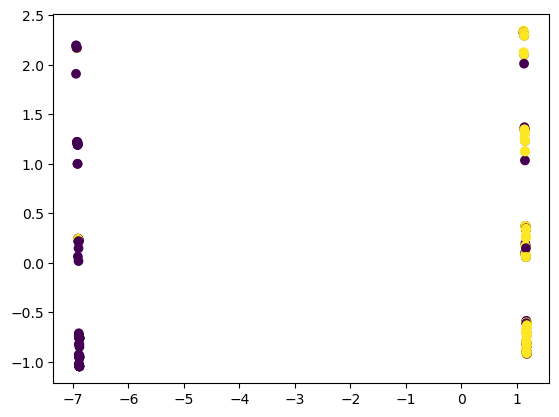

In [10]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X)

X_reduced = pca_model.transform(X)

plt.scatter(X_reduced[:, 0],X_reduced[:, 1],c=y)

extra TSNE ????

#PCA implementation

1 คำนวณค่าเฉลี่ยของข้อมูลในแต่ละคอลัมน์
\begin{aligned}
\bar{x}_{j} = \frac{1}{N}\sum^{N}_{i=1} x_{i,j}
\end{aligned}

$N$ คือจำนวนแถวของข้อมูล

In [11]:
X_bar = X.mean(axis=0)
X_bar.shape
#จำนวนเท่ากับจำนวนcolumn

(11,)

2 ทำการนำเอาข้อมูลในแต่ละแถวมาทำการลบกับข้อมูลค่าเฉลี่ย

\begin{aligned}
\hat{x}_{i,j} = x_{i,j} - \bar{x}_{j}
\end{aligned}

In [12]:
(X-X_bar).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.18241,-0.653094,-0.7443,-0.218241,-0.13355,0.000012,-0.000190,-0.002514,0.004244,1.169524,0.962541
1,0.18241,0.346906,0.2557,-0.218241,-0.13355,-0.000022,-0.000013,-0.002514,0.004244,1.169524,-1.037459
2,0.18241,0.346906,-0.7443,-0.218241,0.86645,-0.000065,-0.000190,-0.011292,0.004244,1.169524,0.962541
3,0.18241,0.346906,-0.7443,0.781759,-0.13355,-0.000076,0.000086,-0.003646,0.004244,1.169524,0.962541
4,0.18241,-0.653094,-0.7443,-0.218241,-0.13355,0.000016,-0.000190,-0.000673,0.004244,1.169524,0.962541


In [13]:
X_hat = (X-X_bar).values
X_hat[5]

array([ 1.82410423e-01,  3.46905537e-01,  1.25570033e+00, -2.18241042e-01,
        8.66449511e-01,  3.63415436e-07,  3.01176653e-04,  1.71677823e-02,
        4.24429440e-03,  1.16952381e+00,  9.62540717e-01])

3 ทำการคำนวณเมตริกซ์แปรปรวน (covariance matrix)
\begin{aligned}
S =
\begin{bmatrix}
var(\mathbf{x}_{1}) & \dots & cov(\mathbf{x}_{1},\mathbf{x}_{n}) \\
\vdots & \ddots & \vdots \\
cov(\mathbf{x}_{n},\mathbf{x}_{1}) & \dots & var(\mathbf{x}_{n}) \\
\end{bmatrix}
\end{aligned}
$n$ คือขนาดของคอลัมน์

สามารถคำนวณได้จาก

$var(\mathbf{x}_{j})$ คือการหาค่าความแปรปรวนของคอลัมน์ที่ $j$
\begin{aligned}
var(\mathbf{x}_{j}) = \frac{1}{N-1} \sum^{N}_{i=1} (x_{i,j}-\bar{x}_{j})(x_{i,j}-\bar{x}_{j})
\end{aligned}

$cov(\mathbf{x}_{j},\mathbf{x}_{k})$ คือการหาค่าความแปรปรวนระหว่างคอลัมน์ที่ $j$ และ $k$
\begin{aligned}
cov(\mathbf{x}_{j},\mathbf{x}_{k}) = \frac{1}{N-1} \sum^{N}_{i=1} (x_{i,j}-\bar{x}_{j})(x_{i,k}-\bar{x}_{k})
\end{aligned}

In [17]:
np.cov(X.T).shape
#output เมทริกส์จัตุรัส 

(11, 11)

In [33]:
n = X.shape[1]
S = np.zeros((n,n))
S.shape
for i in range(n):
    for j in range(n):
        S[i,j] = X_hat[:,i]@X_hat[:,j]

N = X.shape[0]
S = (1/(N-1))*S

In [15]:
#alternative way
S = (1/(N-1))*(X_hat.T@X_hat)

In [34]:
S

array([[ 1.49380151e-01,  6.71232950e-02,  6.74740025e-02,
         7.24795553e-03, -6.90787551e-05,  3.72670401e-06,
         1.09688456e-05,  4.92057794e-04, -4.44816208e-04,
         1.00752642e-02, -7.83778183e-03],
       [ 6.71232950e-02,  2.26931681e-01,  1.60743606e-01,
         2.42307018e-03,  7.27983804e-04,  4.03871557e-06,
         1.23839372e-05,  8.31371623e-04, -7.47340466e-04,
         1.48127821e-02,  1.59678199e-03],
       [ 6.74740025e-02,  1.60743606e-01,  1.01933939e+00,
         2.32689130e-02,  1.95227189e-02,  1.95667415e-05,
         1.05161699e-05,  1.96107972e-03, -1.63024909e-03,
        -1.15265310e-01, -1.93951889e-04],
       [ 7.24795553e-03,  2.42307018e-03,  2.32689130e-02,
         1.70890213e-01, -1.46128136e-03, -9.54055221e-06,
        -8.81398733e-06, -8.30807331e-04, -4.75111715e-04,
        -8.65615254e-02, -2.12390603e-02],
       [-6.90787551e-05,  7.27983804e-04,  1.95227189e-02,
        -1.46128136e-03,  1.15903524e-01,  7.09905201e-06,
  

4 คำนวณหาค่า eigenvalues และ eigenvector ของ $S$ โดยใช้คำสั่ง

 w, v = np.linalg.eig(S)

w คือ eigenvalues

v คือ eigenvector

In [35]:
w, v = np.linalg.eig(S)

In [31]:
w[0]

8.084430378157956

In [36]:
v

array([[-1.13338127e-03, -8.74925023e-02, -1.61408787e-02,
         5.22443469e-01, -6.04456479e-02, -8.44320065e-01,
        -5.09913322e-02,  1.35738199e-03, -2.01573313e-03,
         4.57932937e-05, -1.04087186e-05],
       [-1.55771236e-03, -1.96459049e-01,  3.06210967e-03,
         8.24778364e-01,  6.92635460e-02,  5.25667664e-01,
         5.82252424e-04,  1.83166388e-03, -2.24980416e-03,
         2.42863336e-05,  1.45118446e-05],
       [ 1.63021320e-02, -9.75923723e-01,  5.20438608e-03,
        -2.12624814e-01,  1.64588350e-02, -3.33135714e-02,
         2.62019883e-02,  9.61725375e-04, -1.60424793e-03,
        -7.86989202e-06, -4.69299351e-06],
       [ 1.09843101e-02, -2.53715994e-02, -4.68016657e-02,
         2.05081476e-02, -9.93540559e-01,  8.96095434e-02,
        -3.78988841e-02,  3.23217510e-03,  5.01595672e-03,
        -2.73403089e-05,  2.54849919e-05],
       [ 2.26711776e-04, -2.03537381e-02, -1.59992097e-02,
        -3.27416938e-02,  4.21853396e-02,  3.93852735e-02,
  

In [37]:
(-w).argsort()[:2]

array([0, 1], dtype=int64)

5 ค่าของ eigenvalues แสดงให้เห็นถึงค่าลักษณะเฉพาะของแต่ละคอลัมน์ของ eigenvector  จากนั้นทำการเลือกคอลัมน์ของ eigenvector ที่มี eigenvalues มากที่สุด 2 อันดับแรก

In [38]:
n_components = 2
components = v[:,(-w).argsort()[:n_components]]
components

array([[-1.13338127e-03, -8.74925023e-02],
       [-1.55771236e-03, -1.96459049e-01],
       [ 1.63021320e-02, -9.75923723e-01],
       [ 1.09843101e-02, -2.53715994e-02],
       [ 2.26711776e-04, -2.03537381e-02],
       [ 1.09853709e-06, -1.89103026e-05],
       [-1.33482019e-06, -1.28291898e-05],
       [ 5.18600791e-06, -1.99622426e-03],
       [ 2.20563684e-05,  1.69698985e-03],
       [-9.99804700e-01, -1.57925099e-02],
       [-6.19700616e-04,  2.74394860e-03]])

In [55]:
test_PCA = PCA(n_components=2)
test_PCA.fit_transform(X)
# test_PCA.components_.T



array([[ 1.18364239, -0.83116553],
       [ 1.16765857,  0.34670514],
       [ 1.18497344, -0.61437026],
       ...,
       [ 1.16889788,  0.34125258],
       [ 1.1525958 ,  1.31715765],
       [-6.88516186, -1.02297922]])

6 นำคอลัมน์ของ eigenvector ที่มีค่า eigen value ที่มากที่สุด 2 อันดับแรกที่เราเลือกจากขั้นตอนที่ 5 ทำการ dot product กับข้อมูล X ที่ทำการลบกับค่าเฉลี่ยของตัวเอง

ทำการตรวจสอบคำตอบกับ PCA(n_components=2).fit_transform(X)

หากค่าเหมือนกันแสดงว่าทำการคำนวณได้ถูกต้อง

In [26]:
# So!! this is PCA or Projection
X_hat@components

array([[-1.18364239,  0.83116553],
       [-1.16765857, -0.34670514],
       [-1.18497344,  0.61437026],
       ...,
       [-1.16889788, -0.34125258],
       [-1.1525958 , -1.31715765],
       [ 6.88516186,  1.02297922]])

7 ทำการลดำจำนวนมิติกับข้อมูล Test ด้วยการนำเอาค่าเฉลี่ยที่ได้จากข้อมูล Train ไปทำการลบกับข้อมูล Test และนำผลลัพธ์ที่ได้จากขั้นตอนที่ 4 และ 5 ไปทำการ dot product กับข้อมูล Test

In [27]:
#assume X_test 
# Use stuff from only X_train
X_test = X.copy()
X_test_hat = X_test-X_bar
X_reduce = X_test_hat@components
# ^^^^^^^สอบบบบบตรงนี้^^^^^^^
X_reduce.values

array([[-1.18364239,  0.83116553],
       [-1.16765857, -0.34670514],
       [-1.18497344,  0.61437026],
       ...,
       [-1.16889788, -0.34125258],
       [-1.1525958 , -1.31715765],
       [ 6.88516186,  1.02297922]])

In [425]:
#inverse transform
# มิติเท่าเดิม แต่ข้อมูลอาจใกล้เคียงเดิม
((X_reduce.values@components.T) + X_bar.values)[1]

array([ 0.84924708,  0.7230267 ,  1.06362213,  0.21421158,  0.14034251,
       -0.88521784, -0.55448132, -1.73366275, -5.31951667, -1.25585439,
        1.03723154])

In [426]:
test = np.ones((5,3))
test.sum(axis=1)

array([3., 3., 3., 3., 3.])

PCA Implementation

In [427]:
class handmadePCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.component = None
        self.X_bar = None
        
    def fit(self,X):
        self.X_bar = X.mean(axis=0)
        n = X.shape[1]
        X_hat = X-self.X_bar
        S = np.zeros((n,n))
        S.shape
        for i in range(n):
            for j in range(n):
                S[i,j] = X_hat[:,i]@X_hat[:,j]

        N = X.shape[0]
        S = 1/(N-1)*S
        w, v = np.linalg.eig(S)
        self.component = v[:,(-w).argsort()[:n_components]]
        
    def transform(self,X):
        return (X-self.X_bar) @ self.component
    
    def inverse_transform(self,X):
        return (X@self.component.T) + self.X_bar

In [428]:
X.values[1]

array([ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
       -0.88524513, -0.55450058, -1.73686242, -5.31465827, -1.25923645,
        0.        ])

In [429]:
myPCA = handmadePCA(2)

In [430]:
myPCA.fit(X.values)

In [431]:
reduceX = myPCA.transform(X.values)
reduceX

array([[-1.18364239,  0.83116553],
       [-1.16765857, -0.34670514],
       [-1.18497344,  0.61437026],
       ...,
       [-1.16889788, -0.34125258],
       [-1.1525958 , -1.31715765],
       [ 6.88516186,  1.02297922]])

In [432]:
myPCA.inverse_transform(reduceX)[1]

array([ 0.84924708,  0.7230267 ,  1.06362213,  0.21421158,  0.14034251,
       -0.88521784, -0.55448132, -1.73366275, -5.31951667, -1.25585439,
        1.03723154])

## ทดสอบการประยุกต์ใช้กับ Machine Learning

In [433]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## ทดสอบการประยุกต์ใช้กับงาน Denoising

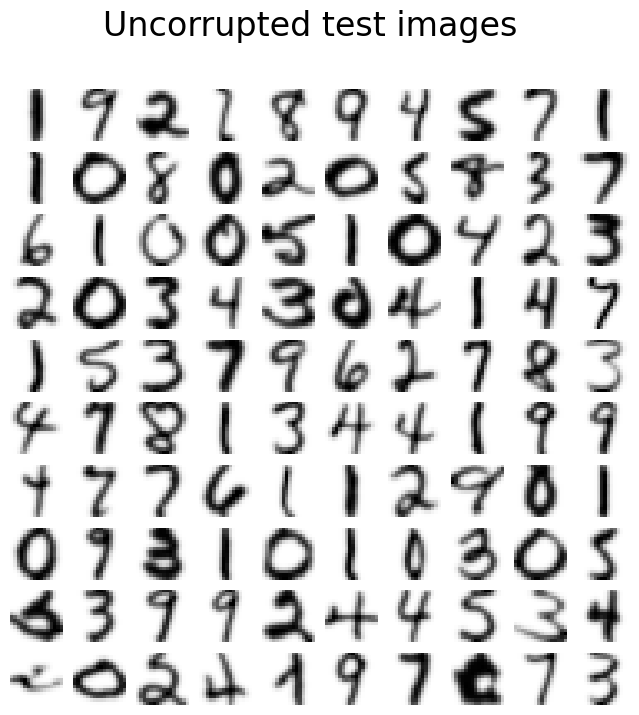

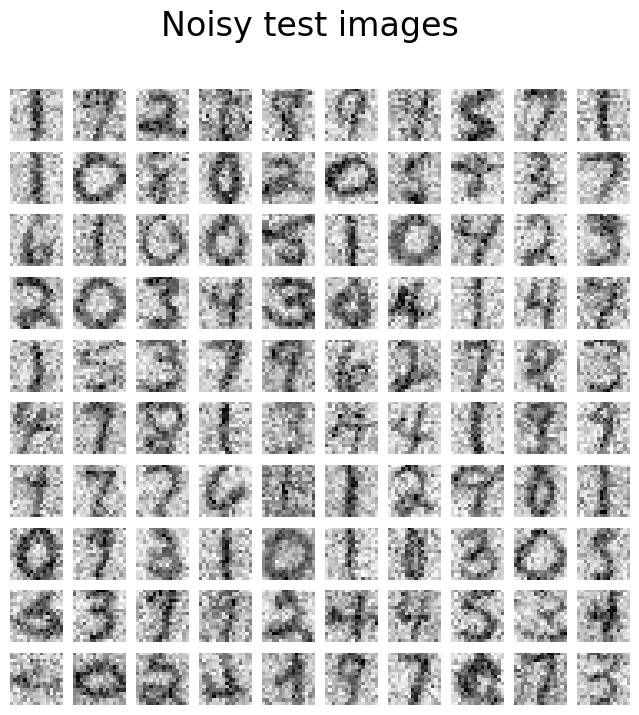

In [434]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = fetch_openml(data_id=41082,return_X_y=True)
y = LabelEncoder().fit_transform(y)
X_train, X_test ,y_train, y_test= train_test_split(X, y, random_state=0, train_size=1_000, test_size=100)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(X_test, "Uncorrupted test images")
plot_digits(X_test_noisy, "Noisy test images")

In [435]:
# pca = handmadePCA(n_components=16)
# pca.fit(X_train_noisy)
# X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

# plot_digits(X_test, "Uncorrupted test images")
# plot_digits(X_reconstructed_pca,"handmadePCA reconstruction")
# plot_digits(X_test_noisy, "Noisy test images")

In [436]:
# pca = PCA(n_components=16)
# pca.fit(X_train_noisy)
# X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

# plot_digits(X_test, "Uncorrupted test images")
# plot_digits(X_reconstructed_pca,"PCA reconstruction")
# plot_digits(X_test_noisy, "Noisy test images")

In [437]:
model_xgb_model = XGBClassifier()
svc_mode = SVC()
lr_model =LogisticRegression()
rf_model = RandomForestClassifier()

In [438]:
myPCA = handmadePCA(n_components=16)
myPCA.fit(X_train_noisy)
X_train_denoise = myPCA.transform(X_train_noisy)
X_test_denoise = myPCA.transform(X_test_noisy)

In [439]:
models = [model_xgb_model, svc_mode, lr_model, rf_model]
model_names = ['model_xgb_model', 'svc_mode', 'lr_model', 'rf_model']
for zipdata in list(zip(models, model_names)):
    model = zipdata[0]
    model_name = zipdata[1]
    model.fit(X_train_denoise, y_train)
    y_pred = model.predict(X_test_denoise)
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_log = classification_report(y_test, y_pred)
    confusion_matrix_log = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:")
    print("Accuracy:", accuracy)
    # print("Classification Report:\n", classification_report_log)
    # print("Confusion Matrix:\n", confusion_matrix_log)
    print("\n")
    

model_xgb_model:
Accuracy: 0.43


svc_mode:
Accuracy: 0.55


lr_model:
Accuracy: 0.52


rf_model:
Accuracy: 0.49




In [440]:
myPCA = PCA(n_components=16)
myPCA.fit(X_train_noisy)
X_train_denoise = myPCA.transform(X_train_noisy)
X_test_denoise = myPCA.transform(X_test_noisy)

In [441]:
models = [model_xgb_model, svc_mode, lr_model, rf_model]
model_names = ['model_xgb_model', 'svc_mode', 'lr_model', 'rf_model']
for zipdata in list(zip(models, model_names)):
    model = zipdata[0]
    model_name = zipdata[1]
    model.fit(X_train_denoise, y_train)
    y_pred = model.predict(X_test_denoise)
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_log = classification_report(y_test, y_pred)
    confusion_matrix_log = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:")
    print("Accuracy:", accuracy)
    # print("Classification Report:\n", classification_report_log)
    # print("Confusion Matrix:\n", confusion_matrix_log)
    print("\n")

model_xgb_model:
Accuracy: 0.88


svc_mode:
Accuracy: 0.88


lr_model:
Accuracy: 0.86


rf_model:
Accuracy: 0.89




In [471]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [473]:
myPCA = PCA(n_components=4)
myPCA.fit(X_train)
X_train_denoise = myPCA.transform(X_train)
X_test_denoise = myPCA.transform(X_test)

models = [model_xgb_model, svc_mode, lr_model, rf_model]
model_names = ['model_xgb_model', 'svc_mode', 'lr_model', 'rf_model']
for model, model_name in zip(models, model_names):
    model.fit(X_train_denoise, y_train)
    y_pred = model.predict(X_test_denoise)
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_log = classification_report(y_test, y_pred)
    confusion_matrix_log = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:")
    print("Accuracy:", accuracy)
    # print("Classification Report:\n", classification_report_log)
    # print("Confusion Matrix:\n", confusion_matrix_log)
    print("\n")

model_xgb_model:
Accuracy: 0.7723577235772358


svc_mode:
Accuracy: 0.8130081300813008


lr_model:
Accuracy: 0.8130081300813008


rf_model:
Accuracy: 0.7154471544715447




In [474]:
myPCA = handmadePCA(n_components=4)
myPCA.fit(X_train.values)
X_train_denoise = myPCA.transform(X_train.values)
X_test_denoise = myPCA.transform(X_test.values)

models = [model_xgb_model, svc_mode, lr_model, rf_model]
model_names = ['model_xgb_model', 'svc_mode', 'lr_model', 'rf_model']
for model, model_name in zip(models, model_names):
    model.fit(X_train_denoise, y_train)
    y_pred = model.predict(X_test_denoise)
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_log = classification_report(y_test, y_pred)
    confusion_matrix_log = confusion_matrix(y_test, y_pred)
    print(f"{model_name}:")
    print("Accuracy:", accuracy)
    # print("Classification Report:\n", classification_report_log)
    # print("Confusion Matrix:\n", confusion_matrix_log)
    print("\n")

model_xgb_model:
Accuracy: 0.7560975609756098


svc_mode:
Accuracy: 0.8130081300813008


lr_model:
Accuracy: 0.8130081300813008


rf_model:
Accuracy: 0.6991869918699187


